Test du projet de class trajets indirect

In [25]:
%load_ext autoreload
%autoreload 2
import sys #c'est pas propre mais pour le moment pour importer mes modules perso dans le notebook je ne sais pas faire
sys.path.append(r'C:\Users\martin.schoreisz\git\Outils\Outils\Martin_Perso')
import traitement_od as t
import pandas as pd
import numpy as np
import altair as alt
import datetime as dt
pd.set_option('display.max_colwidth', 1000)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%time df_journee=t.ouvrir_fichier_lapi('2019-01-29 00:00:00','2019-01-30 23:59:00')

Wall time: 1min 45s


In [7]:
toto=t.trajet_indirect(df_journee,'2019-01-29 00:00:00', 60, 16, [19,4,5])

In [74]:
toto.df_transit.empty

True

In [38]:
liste_trajet=(pd.DataFrame([{'o_d':'A63-A10','trajets':[{'cameras':[19,4,5],'type_trajet':'indirect'},
                                                       {'cameras':[19,1,5],'type_trajet':'indirect'},
                                                       {'cameras':[19,5],'type_trajet':'direct'},
                                                      ]},
                          {'o_d':'A62-A10','trajets':[{'cameras':[10,4,5],'type_trajet':'indirect'},
                                                       {'cameras':[10,1,5],'type_trajet':'indirect'},
                                                       {'cameras':[10,5],'type_trajet':'direct'},
                                                      ]},
                           ]))

In [39]:
liste_trajet

,o_d,trajets
0,A63-A10,"[{'cameras': [19, 4, 5], 'type_trajet': 'indirect'}, {'cameras': [19, 1, 5], 'type_trajet': 'indirect'}, {'cameras': [19, 5], 'type_trajet': 'direct'}]"
1,A62-A10,"[{'cameras': [10, 4, 5], 'type_trajet': 'indirect'}, {'cameras': [10, 1, 5], 'type_trajet': 'indirect'}, {'cameras': [10, 5], 'type_trajet': 'direct'}]"


Pour une o_d, sur une journee

In [11]:
dates= pd.date_range('2019-01-29', periods=24, freq='H')
%time 
for date in dates : 
    date=date.strftime("%Y-%m-%d %H:%M:%S")
    for index, value in liste_trajet.iterrows() : 
        o_d, carac_trajet=value[0],value[1]
        for dico_carac in carac_trajet :
            cameras=dico_carac['cameras']
            type_t=dico_carac['type_trajet']
            if type_t=='indirect' : 
                df_trajet=t.trajet_indirect(df_journee,date, 60, 16, cameras).df_transit#en deduire le total
            else :
                df_trajet=t.trajet_direct(df_journee,date, 60, 16, cameras[0],cameras[1]).df_tps_parcours_pl_final#por permettre le suivi et retrouver les camera intermediaires
            if df_trajet.empty : 
                continue
            #df_trajet['cameras']=str(cameras)#pour suivi possible
            if 'dico_od' in locals() :
                dico_od=pd.concat([dico_od,df_trajet], sort=False)
            else : 
                dico_od=df_trajet
            print(date, cameras, len(df_trajet))

Wall time: 0 ns
2019-01-29 07:00:00 [19, 4, 5] 9
2019-01-29 07:00:00 [19, 5] 1
2019-01-29 08:00:00 [19, 4, 5] 86
2019-01-29 08:00:00 [19, 1, 5] 2
2019-01-29 08:00:00 [19, 5] 15
2019-01-29 09:00:00 [19, 4, 5] 78
2019-01-29 09:00:00 [19, 1, 5] 2
2019-01-29 09:00:00 [19, 5] 14
2019-01-29 10:00:00 [19, 4, 5] 43
2019-01-29 10:00:00 [19, 1, 5] 2
2019-01-29 10:00:00 [19, 5] 25
2019-01-29 11:00:00 [19, 4, 5] 34
2019-01-29 11:00:00 [19, 1, 5] 1
2019-01-29 11:00:00 [19, 5] 28
2019-01-29 12:00:00 [19, 5] 82
2019-01-29 13:00:00 [19, 4, 5] 5
2019-01-29 13:00:00 [19, 5] 64
2019-01-29 14:00:00 [19, 4, 5] 46
2019-01-29 14:00:00 [19, 1, 5] 3
2019-01-29 14:00:00 [19, 5] 36
2019-01-29 15:00:00 [19, 4, 5] 31
2019-01-29 15:00:00 [19, 1, 5] 2
2019-01-29 15:00:00 [19, 5] 14
2019-01-29 16:00:00 [19, 5] 1
2019-01-29 17:00:00 [19, 4, 5] 1


In [12]:
dico_od#pour verif

,immat,date_cam_1,date_cam_2,cam_1,cam_2,tps_parcours,cameras
0,997d5fbf94327159d8ad2dfe88999cf8a1a32fad,2019-01-29 07:41:57,2019-01-29 08:17:44,19,5,00:35:47,"[19, 4, 5]"
1,1da7ad5637f24c08d9a8bb1da3f932c21e8dd47c,2019-01-29 07:45:33,2019-01-29 08:22:36,19,5,00:37:03,"[19, 4, 5]"
2,382ff3d11f92aaa8d00c7e8061ff61c0eecbfc00,2019-01-29 07:53:24,2019-01-29 08:28:22,19,5,00:34:58,"[19, 4, 5]"
3,eb6b0e2bc49e9ea29fb491193621a90417323bf4,2019-01-29 07:54:19,2019-01-29 08:30:39,19,5,00:36:20,"[19, 4, 5]"
4,a7e4a67e8836b4fdb72688baca377534f6add717,2019-01-29 07:56:06,2019-01-29 08:32:54,19,5,00:36:48,"[19, 4, 5]"
5,b3e2b06a429608e99c98d074851e49cbb6fb93ad,2019-01-29 07:56:03,2019-01-29 08:34:34,19,5,00:38:31,"[19, 4, 5]"
6,f25b2cd42e0b20614640abc3418ec2af63af5042,2019-01-29 07:57:56,2019-01-29 08:34:25,19,5,00:36:29,"[19, 4, 5]"
7,2dca9f2506ef4f67da0255625f046d1b40348d6e,2019-01-29 07:58:35,2019-01-29 08:35:20,19,5,00:36:45,"[19, 4, 5]"
8,914a3afe6d6abb263b99c20884c88ae7c8a383dd,2019-01-29 07:59:36,2019-01-29 08:35:38,19,5,00:36:02,"[19, 4, 5]"
9,04cdedf0bf6f15c9698dce79ad3157720ea29448,2019-01-29 07:54:45,2019-01-29 10:26:17,19,5,02:31:32,"[19, 5]"


In [40]:
#test graphs

In [135]:
test_graph1=t.trajet_direct(df_journee,'2019-01-29 08:00:00', 60, 16, 19,4)

In [138]:
g_pl_ok=test_graph1.plot_graphs()[2]

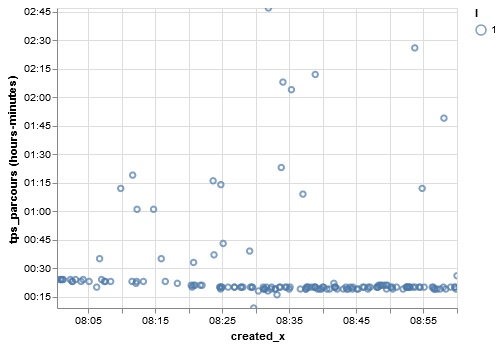

In [139]:
g_pl_ok

In [140]:
graphs_bruts=test_graph1.plot_graphs()[1]

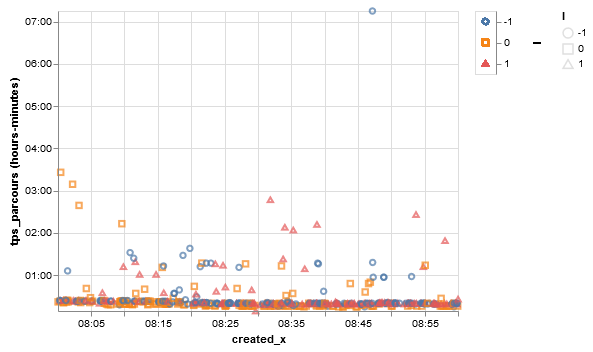

In [141]:
graphs_bruts

In [142]:
g_pl_90_pctl=test_graph1.plot_graphs()[4]

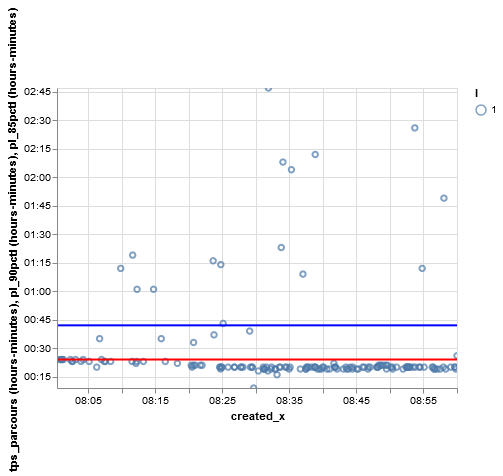

In [143]:
g_pl_90_pctl

In [126]:
test_graph1.df_pl_ok

,created_y,created_x,camera_id_x,immat,fiability_x,l_x,state_x,camera_id_y,fiability_y,l_y,state_y,l,fiability,tps_parcours
171,2019-01-30 08:44:53,2019-01-29 17:03:24,19,1352bf1fd49ca28f77610e5fc46c0e952ea66040,79,1,FR,4,99,1,FR,1,True,15:41:29


In [132]:
70/40


1.75

In [133]:
40/70

0.5714285714285714

In [134]:
0.07*60

4.2